In [1]:
!pwd

/home/max/Documents/psinder/scripts


In [2]:
import os
import lzma
import json
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [8]:
with lzma.open('../db/dogs.jsonl.xz', 'rt') as f:
    dogs = [json.loads(line) for line in f.readlines()]
    for dog in dogs:
        dog['vector'] = np.array(dog['vector'])

In [4]:
vecs = {}
with lzma.open('../db/vecs.csv.xz', 'rt') as f:
    for line in f.readlines():
        cols = line.split(',')
        name, vec = cols[0], [float(x) for x in cols[1:]]
        vecs[name] = np.array(vec)

FileNotFoundError: [Errno 2] No such file or directory: '../db/vecs.csv.xz'

In [8]:
with open('../db/dogs.jsonl', 'w') as f:
    i = 1000
    for dog in dogs:
        imgs = [os.path.basename(os.path.dirname(url)) + '.jpg' for url in dog['photos']]
        dog['photos_files'] = imgs
        dog_vecs = [vecs[img] for img in imgs if img in vecs]
        if not dog_vecs: continue
        dog['vector'] = list(np.array(dog_vecs).reshape(-1, 256).mean(0))
        dog['id'] = i
        i += 1
        print(json.dumps(dog, ensure_ascii=False), file=f)

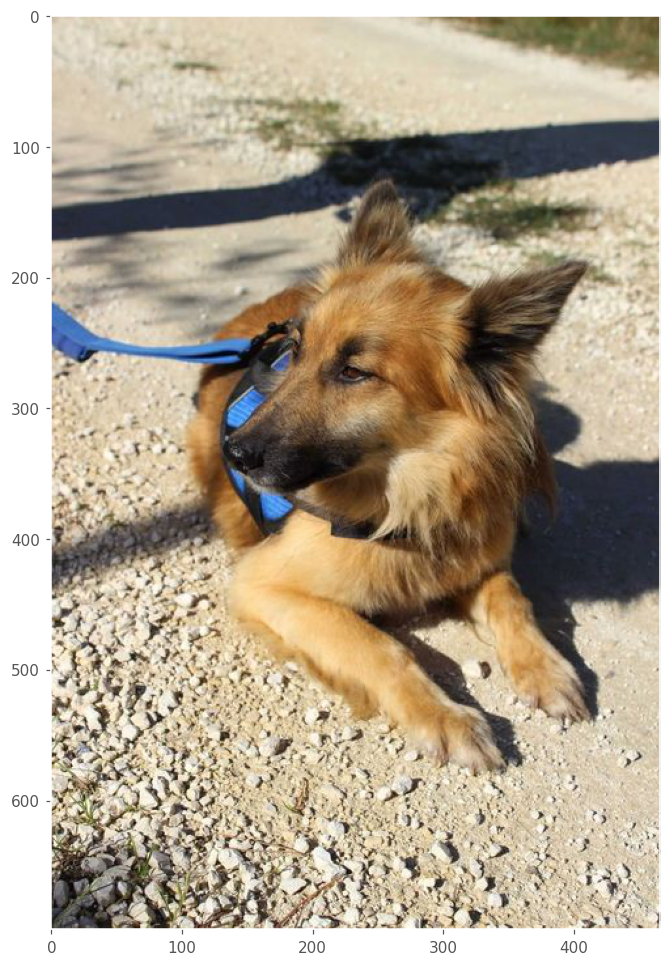

In [31]:
import matplotlib.image as mpimg
def read_photo(name):
    return mpimg.imread('../db/partial/imgs/' + name)

anchor_id = 0
anchor = dogs[anchor_id]
anchor_vec = anchor['vector']

plt.imshow(read_photo(anchor['photos_files'][0]))
plt.grid(False)

In [39]:
from scipy.spatial.distance import cdist
query = sorted(dogs, key=(lambda x: ((x['vector'] - anchor_vec)**2).sum()))
#query = sorted(dogs, key=(lambda x: cdist(x['vector'].reshape(1, -1), anchor_vec.reshape(1, -1), 'cosine')))

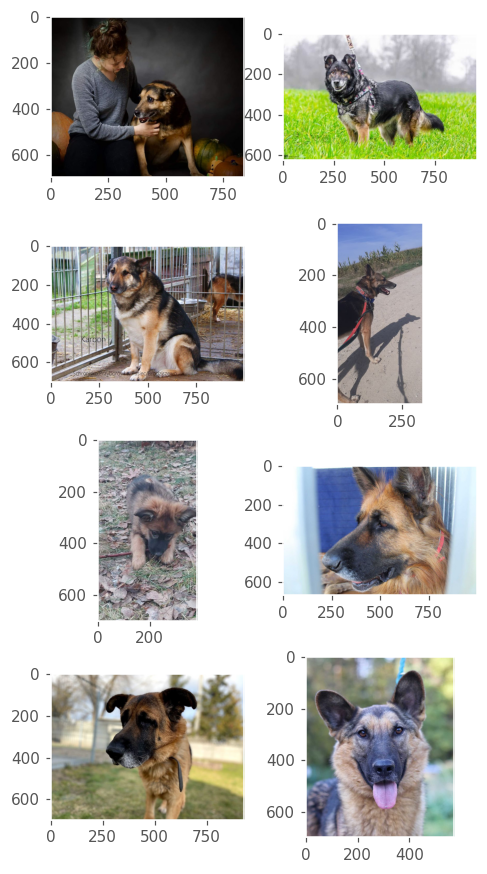

In [40]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(5, 10))
for i, ax in enumerate(axs.reshape(-1)):
    ax.imshow(read_photo(query[i+2]['photos_files'][0]))
    ax.grid(False)

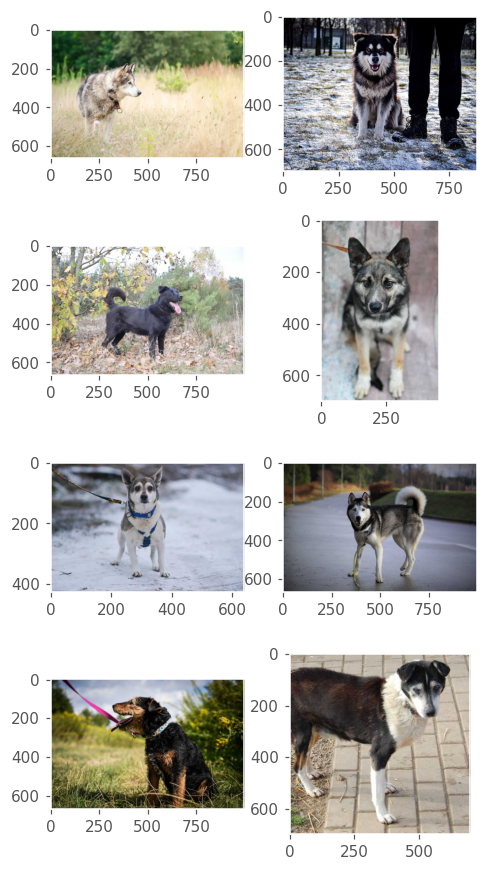

In [41]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(5, 10))
for i, ax in enumerate(axs.reshape(-1)):
    ax.imshow(read_photo(query[-(i+1)]['photos_files'][0]))
    ax.grid(False)